In [1]:
import numpy as np
import matplotlib.pyplot as plt

##**Exercise 1**

[Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) 569 datapoints, 30 variables, 2 classes



$$
x^{(i)}=[x^{(i)}_1,x_2^{(i)},...,x_{30}^{(i)}],\quad y^{(i)}=0,1
$$


$$
$$

Attribute Information:

    radius (mean of distances from center to points on the perimeter)

    texture (standard deviation of gray-scale values)

    perimeter

    area

    smoothness (local variation in radius lengths)

    compactness (perimeter^2 / area - 1.0)

    concavity (severity of concave portions of the contour)

    concave points (number of concave portions of the contour)

    symmetry

    fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.




    class:

            WDBC-Malignant

            WDBC-Benign



In [53]:
#load the dataset
from sklearn import datasets
X,y=datasets.load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)
#rows of X are the coordinates x1...x30
#y contains the classes 0,1

(569, 30)
(569,)


Draw a picture like below of the distributions of the values of coordinates $x_1,..,x_{30}$

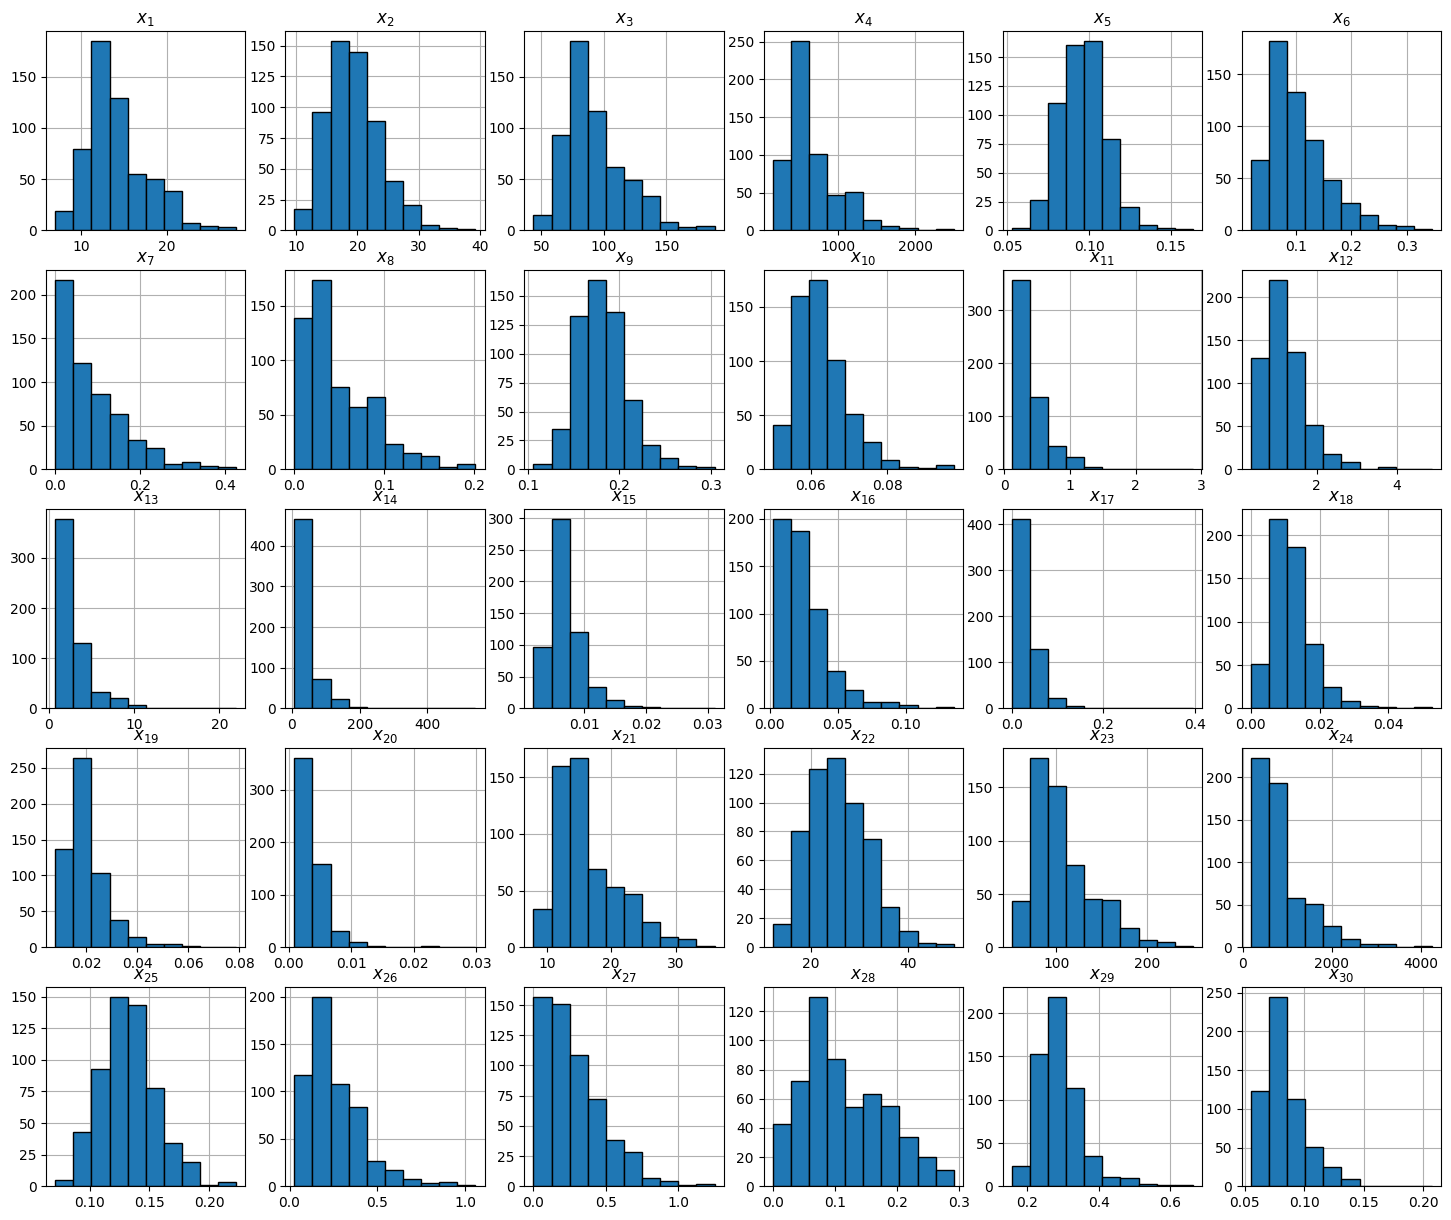

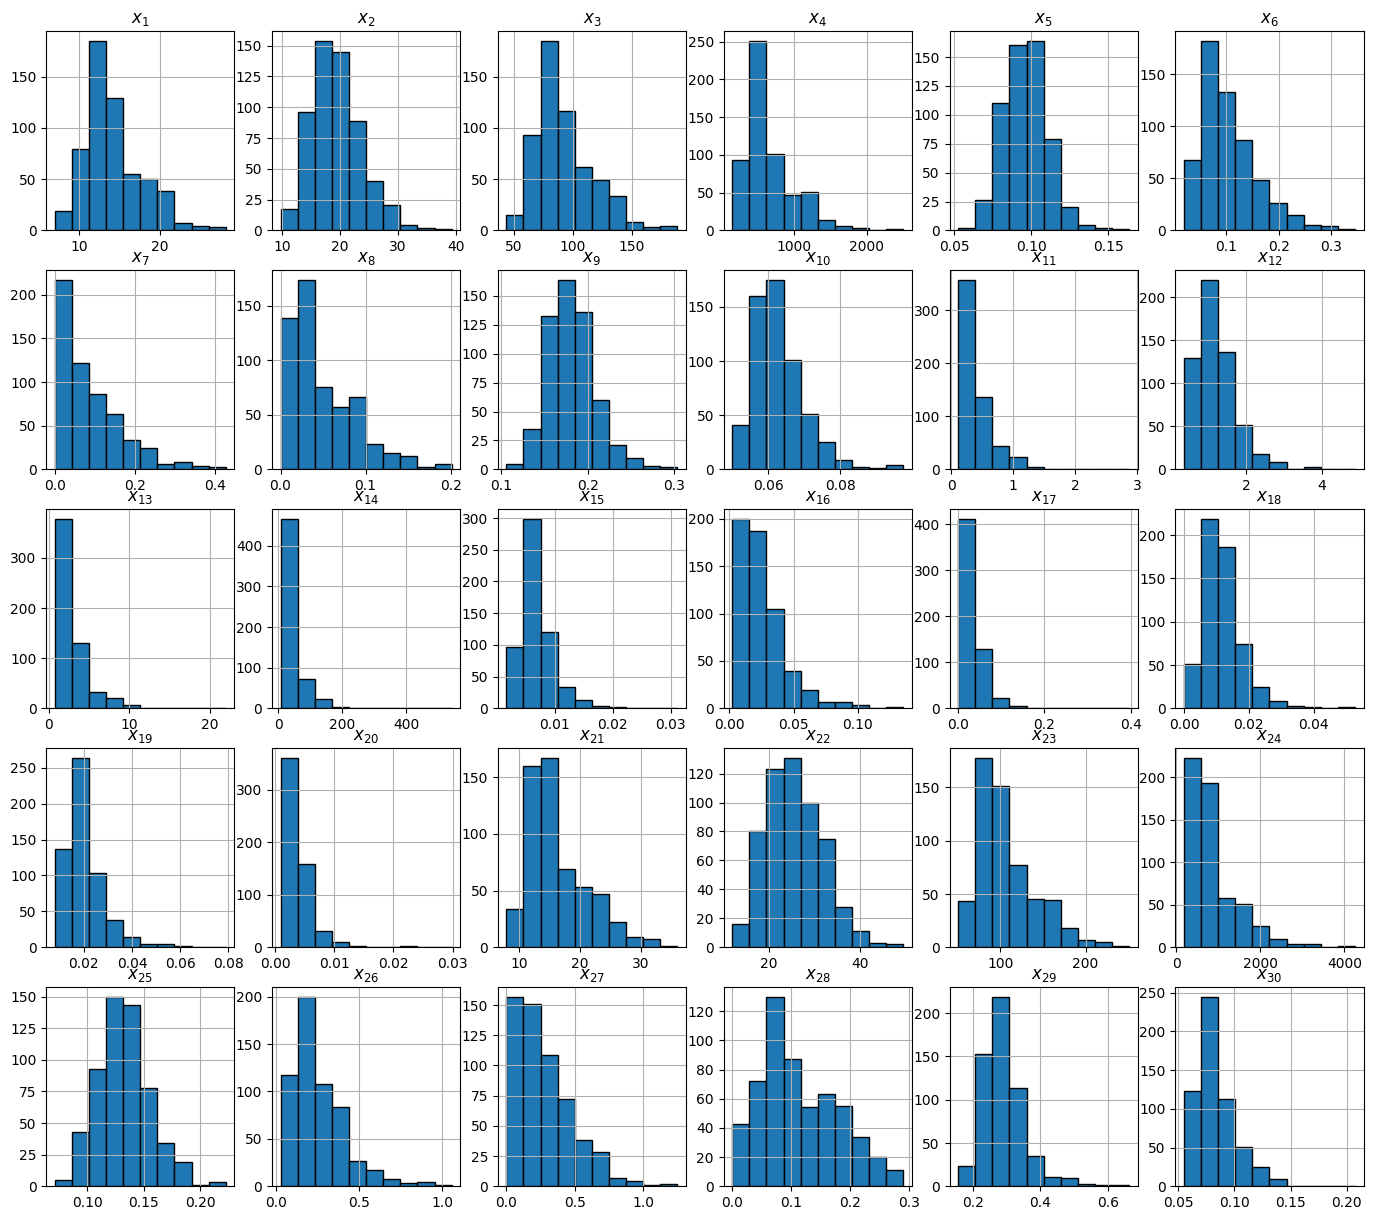

In [59]:
# Distribution of the values of all 30 features
plt.figure(figsize=(17, 15))

for k in range(30):  # Loop through all 30 features
    plt.subplot(5, 6, k + 1)  # Arrange in a 5x6 grid
    plt.grid(zorder=1)  # Grid is in the background
    plt.hist(X[:, k], bins=10, edgecolor='k')
    plt.title(rf'$x_{{{k+1}}}$')  # Correct LaTeX subscript

plt.show()

Find coefficients to a formula

$$
z=w_1\widehat{x}_1+w_2\widehat{x}_2+\dots+w_{30}\widehat{x}_{30}+b
$$

for the classification of a point $x=[x_1,x_2,...,x_{30}]$ using the scaled coordinates (means $=0$ and standard deviations $=1$)
and draw a picture like below:

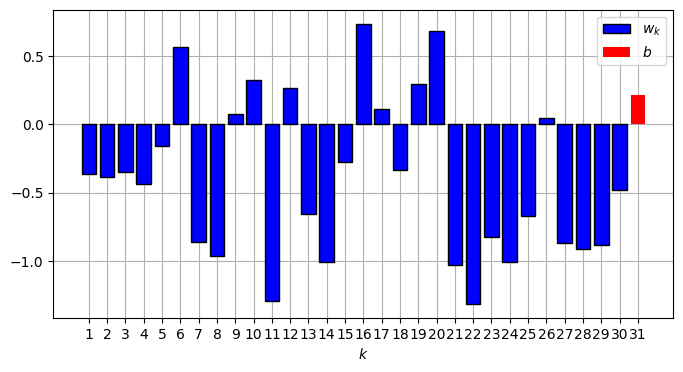

In [55]:
#scaled coordinates, means = 0 and standard deviations = 1
mu=np.mean(X,axis=0)
s=np.std(X,axis=0)
Xhat=(X-mu)/s

In [56]:
#scikit-learn-library
#scaled datapoints as rows of  m x 2-matrix Xhat
#classes in 1D-array y
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(Xhat,y) #minimizes regularized cost
#model=LogisticRegression(penalty=None).fit(Xhat,y) #minimizes non-regularized cost
w=model.coef_
b=model.intercept_

print(w)
print(b)

[[-0.37545731 -0.38203064 -0.36097105 -0.43946905 -0.16737642  0.56070701
  -0.85529546 -0.96284928  0.07631246  0.3284581  -1.28926139  0.26511648
  -0.6718954  -0.99886093 -0.27950865  0.74407728  0.1012066  -0.32314492
   0.29504386  0.68174616 -1.02658552 -1.32055634 -0.82039667 -0.99467101
  -0.66571519  0.05114225 -0.88022314 -0.92517516 -0.88871131 -0.48699036]]
[0.22088611]


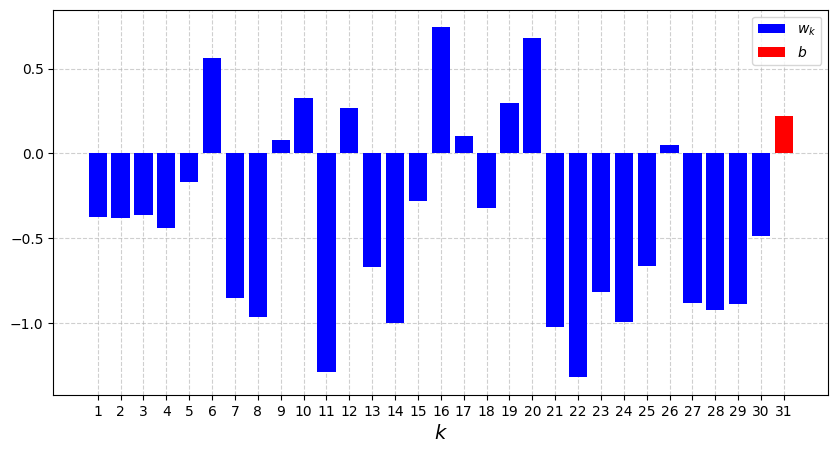

In [58]:
# Indices
x_indices = np.arange(1, 31)  # 1 to 30 for weights
x_b = 31  # Separate index for bias term

plt.figure(figsize=(10, 5))

# Plot weights as bars
plt.bar(x_indices, w.flatten(), color='blue', label=r'$w_k$', zorder=2)

# Plot bias term in red
plt.bar(x_b, b, color='red', label=r'$b$', zorder=2)

# Labels and grid
plt.xlabel(r'$k$', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6, zorder=1)
plt.xticks(np.arange(1, 32, step=1))  # Show all indices
plt.legend()
plt.show()

Create the confusion matrix

$$
$$

ans: $
 \left[\begin{array}{cc}
207&   5\\
2&355
\end{array}\right]
$


$$
$$


and classify the point

$x=[ 13.61    ,  24.98    ,  88.05    , 582.7     ,   0.09488 ,
         0.08511 ,   0.08625 ,   0.04489 ,   0.1609  ,   0.05871 ,
         0.4565  ,   1.29    ,   2.861   ,  43.14    ,   0.005872,
         0.01488 ,   0.02647 ,   0.009921,   0.01465 ,   0.002355,
        16.99    ,  35.27    , 108.6     , 906.5     ,   0.1265  ,
         0.1943  ,   0.3169  ,   0.1184  ,   0.2651  ,   0.07397 ]$


$$
$$

ans: $y=0$

In [60]:
#predicted classes of datapoints
ypred=model.predict(Xhat)
#accuracy of predictions
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,ypred)) #row = class 0/1, columns = prediction 0/1


[[207   5]
 [  2 355]]


In [64]:
xt=np.array([[13.61,24.98,88.05,582.7,
              0.09488,0.08511,0.08625,0.04489,
              0.1609,0.05871,0.4565,1.29,2.861,43.14,
              0.005872,0.01488,0.02647,0.009921,0.01465,
              0.002355,16.99,35.27,108.6,906.5,0.1265,0.1943,
              0.3169,0.1184,0.2651,0.07397]])

#scaling
xthat=(xt-mu)/s
ytpred=model.predict(xthat) #class 0/1
print(ytpred)

[0]


##**Exercise 2**







[Wine recognition-dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html), 178 datapoints, 13 variables, 3 classes

$$
x^{(i)}=[x_1^{(i)},x_2^{(i)},...,x_{13}^{(i)}],\quad y^{(i)}=0,1,2
$$

Wine data set of chemical properties of Italian
wines. The data set includes measurements of 13 different
properties for 178 wines, giving a data matrix of
dimension 178 x 13.

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline

Each of these 178 wines comes from one of three grape
varieties: Barolo, Grignolino, or Barbera (0,1 tai 2).

In [19]:
#load the dataset
from sklearn import datasets
X,y=datasets.load_wine(return_X_y=True)
#rows of X are the coordinates x1...x13
#y contains the classes 0,1,2

Draw a picture like below of the distribution of values of the coordinates $x_1-x_{13}$ within each class

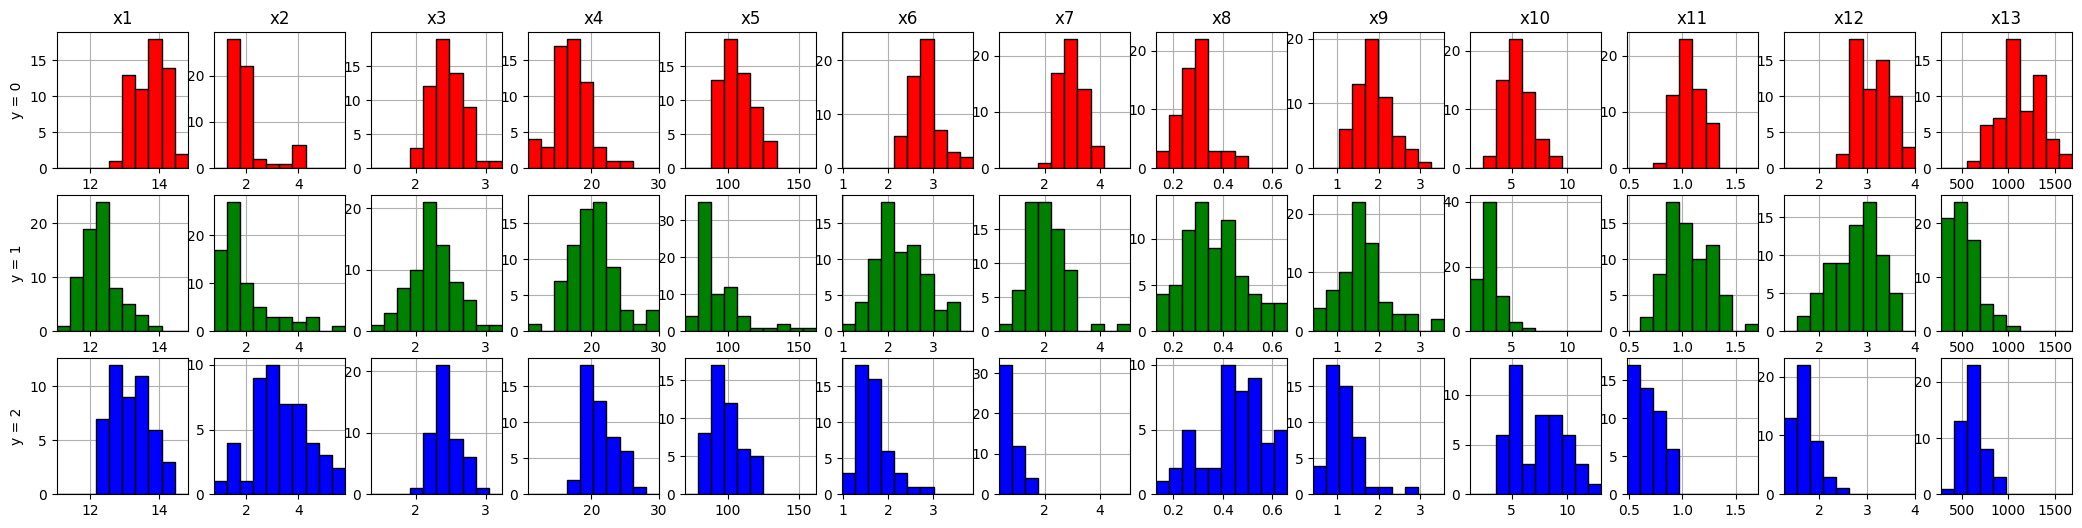

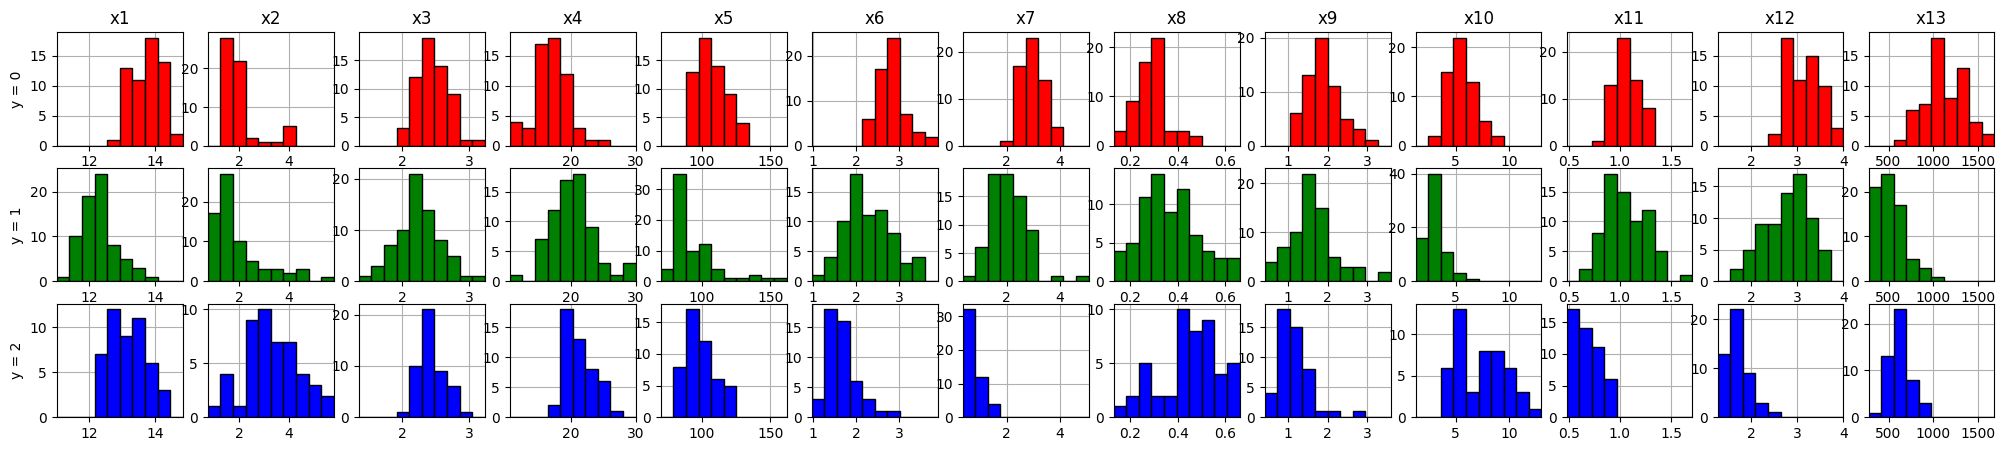

In [20]:
#distribution of values of the coordinates within each class
plt.figure(figsize=(25,5))

for k in range(13):
  plt.subplot(3,13,k+1)
  mk=np.min(X[:,k])
  Mk=np.max(X[:,k])
  binsk=np.linspace(mk,Mk,11)
  plt.hist(X[y==0,k],binsk,edgecolor='k',color='r',zorder=2)
  plt.title('x'+str(k+1))
  plt.grid()
  plt.xlim(mk,Mk)
  if k==0:
    plt.ylabel('y = 0')
  plt.subplot(3,13,k+14)
  plt.hist(X[y==1,k],binsk,edgecolor='k',color='g',zorder=2)
  plt.grid()
  plt.xlim(mk,Mk)
  if k==0:
    plt.ylabel('y = 1')
  plt.subplot(3,13,k+27)
  plt.hist(X[y==2,k],binsk,edgecolor='k',color='b',zorder=2)
  plt.grid()
  plt.xlim(mk,Mk)
  if k==0:
    plt.ylabel('y = 2')

Find coefficients to the formula

$$
[z_1,z_2,z_3]=[\widehat{x}_1,\widehat{x}_2,...,\widehat{x}_{13}]@\left[
\begin{array}{ccc}
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}\\
\vdots&\vdots&\vdots\\
w_{13,1}&w_{13,2}&w_{13,3}
\end{array}
\right]+[b_1,b_2,b_3]
$$

to classify a wine $ x=[x_1,x_2,\dots,x_{13}]$ using the scaled coordinates  (means $= 0$ and standard deviations $= 1$), and draw a picture like below.



In [21]:
#scaled coordinates, means = 0 and stds = 1
mu=np.mean(X,axis=0)
s=np.std(X,axis=0)
Xhat=(X-mu)/s

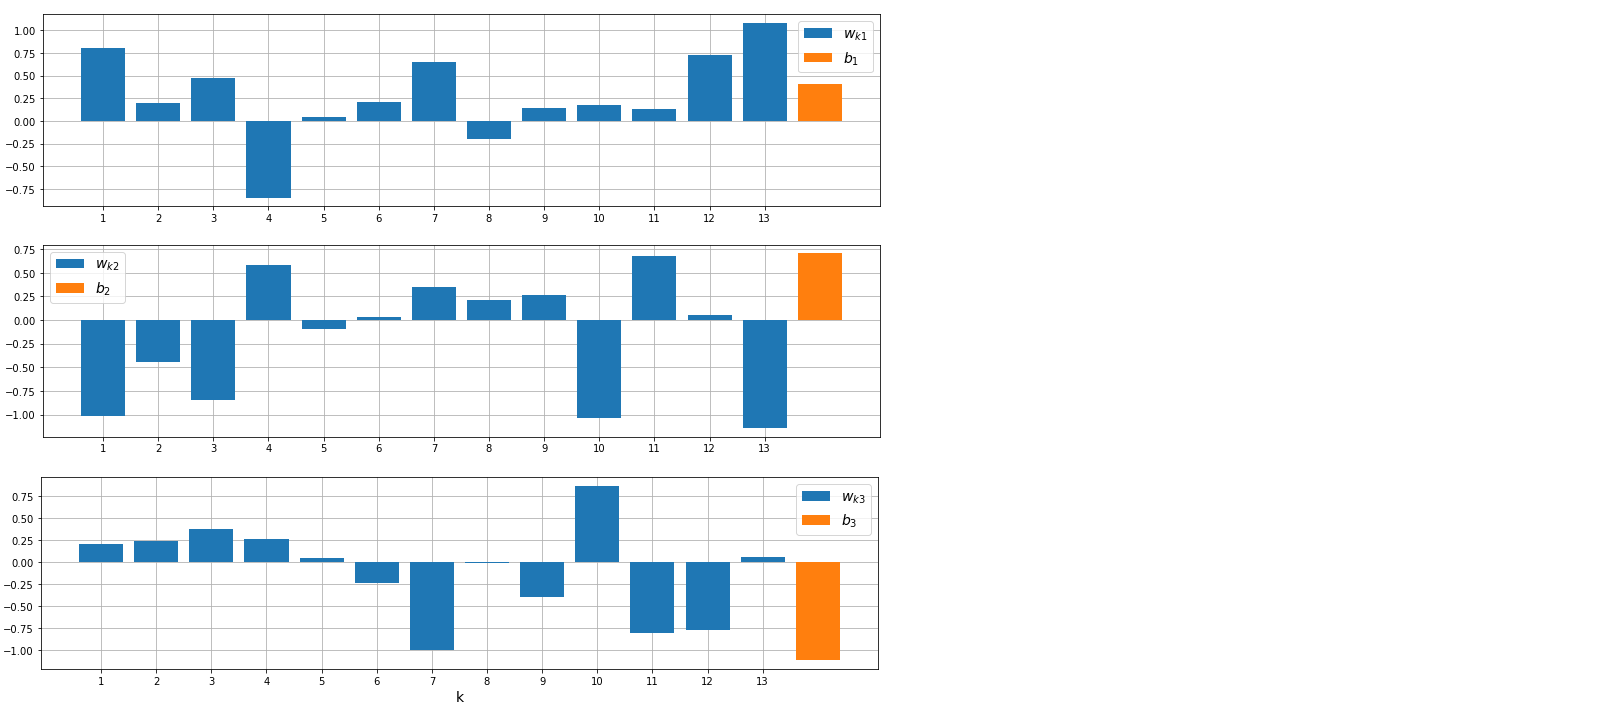

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(Xhat,y) #minimizes regularized cost
#model = LogisticRegression(penalty=None).fit(Xhat,y) #minimizes non-regularized cost

w=model.coef_ #NOTE: transpose of the matrix given by sklearn !
print(w)
print('\n')
b=model.intercept_
print(b)
wk1 = w[0]
wk2 = w[1]
wk3 = w[2]

[[ 0.8121452   0.20245508  0.47041906 -0.84175663  0.04838652  0.20755877
   0.6528666  -0.19660028  0.13911376  0.17791924  0.12857678  0.7279941
   1.07910229]
 [-1.01293134 -0.44044169 -0.84700727  0.58181078 -0.09604902  0.03202783
   0.35140871  0.21096695  0.26093181 -1.04353498  0.68081149  0.0513317
  -1.14314703]
 [ 0.20078614  0.2379866   0.37658821  0.25994586  0.04766251 -0.2395866
  -1.00427531 -0.01436667 -0.40004557  0.86561574 -0.80938827 -0.7793258
   0.06404474]]


[ 0.41504225  0.70048649 -1.11552875]


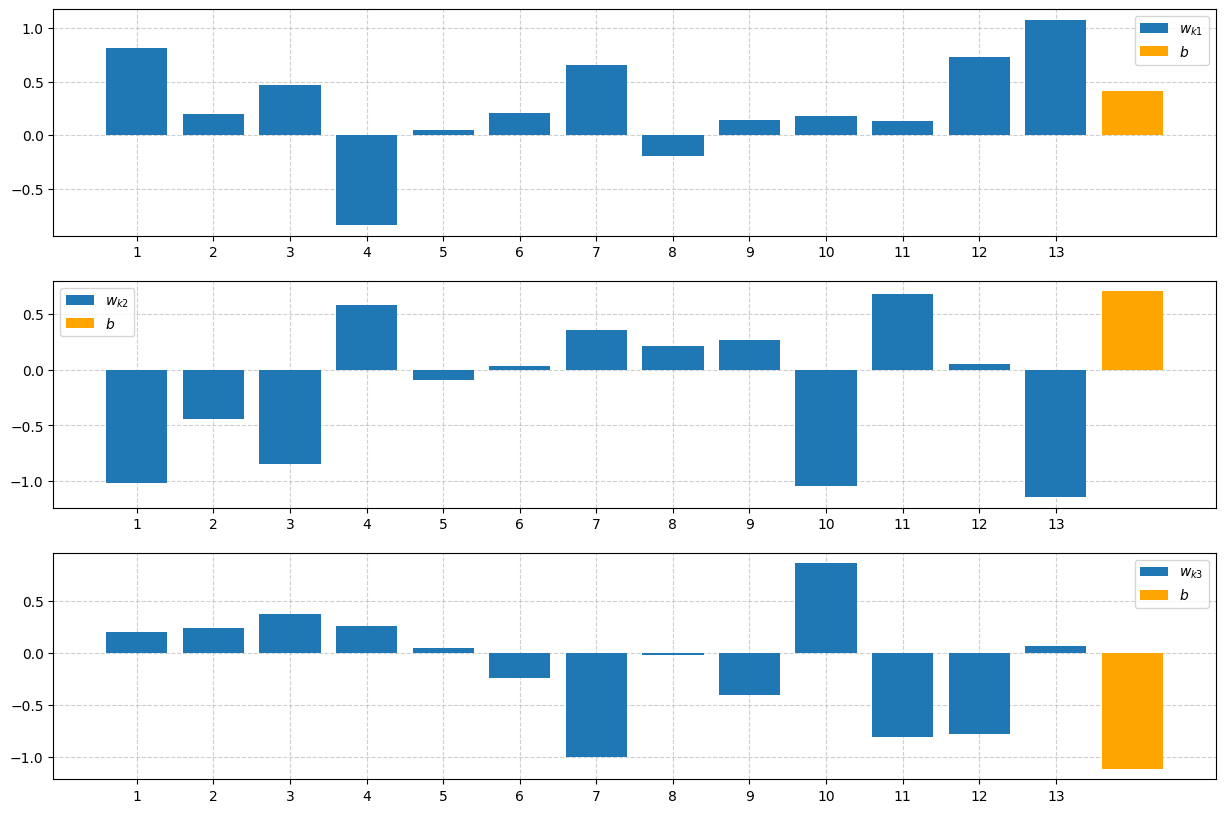

In [59]:
# Indices
x_indices = np.arange(1, 14)  # 1 to 30 for weights
x_b = 14  # Separate index for bias term

plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.grid(True, linestyle="--", alpha=0.6, zorder=1)  # Grid inside the loop

    # Plot weights as bars
    plt.bar(x_indices, w[i], label=rf'$w_{{k{i+1}}}$', zorder=2)

    # Plot bias term in red
    plt.bar(x_b, b[i], color='orange', label=r'$b$', zorder=2)
    plt.xticks(np.arange(1, 14, step=1))  # Show all indices
    plt.legend()  # Legend inside each subplot

plt.show()

Create the  confusion matrix

ans: $\left[\begin{array}{ccc}
59&0&0\\0&71&0\\0&0&48
\end{array}\right]$

and classify the wine

$x=[13.0,2.34,2.36,19.5,99.7,2.29,2.03,0.36,1.59,5.1,0.96,2.61,746]$

(ans: $y=1$)

In [60]:
from sklearn.metrics import confusion_matrix
ypred=model.predict(Xhat)
cm=confusion_matrix(y, ypred)
print(cm) #row = class, column = prediction

[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


In [61]:
#test point
xt=np.array([[13.0,2.34,2.36,19.5,99.7,2.29,2.03,0.36,1.59,5.1,0.96,2.61,746]])
xthat=(xt-mu)/s
ytpred=model.predict(xthat)
print(ytpred)

[1]


## **Exercise 3**










Use the points $x^{(i)}=[x_1^{(i)},x_2^{(i)}],\,y^{(i)}=0,1,$ given below to find coefficients $w_1,w_2,w_3,w_4,w_5$ and $b$ such that a point $x=[x_1,x_2]$ belongs to

class $y=1$, if
$z=w_1x_1^2+w_2x_1x_2+w_3x_2^2+w_4x_1+w_5x_2+b> 0$

class $y=0$, if $z<0$


using logistic regression for the datapoints

 $$[(x^{(i)}_1)^2,x^{(i)}_1x^{(i)}_2,(x^{(i)}_2)^2,x^{(i)}_1,x^{(i)}_2 ],\quad y^{(i)}$$

and draw a picture like below of the corresponding classification of 2D-points

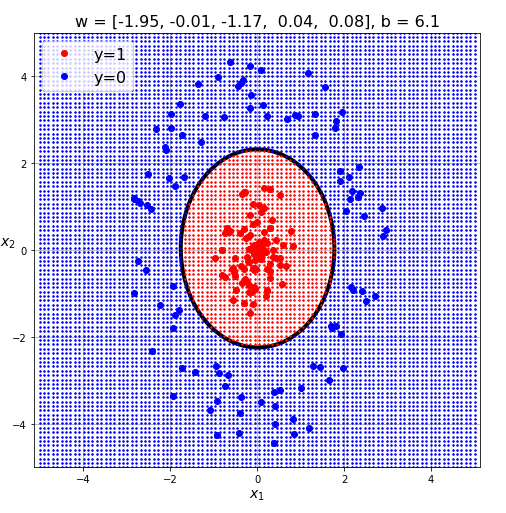

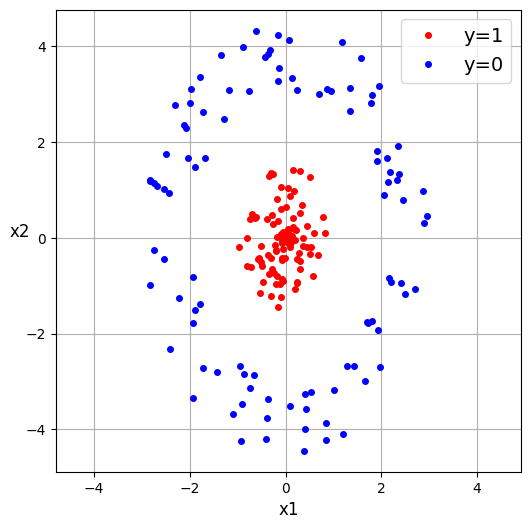

In [19]:
np.random.seed(0)

k = 100
r1 = np.random.uniform(0, 1, k)
th1 = np.random.uniform(0, 2 * np.pi, k)
x1pun = r1 * np.cos(th1)
x2pun = 1.5 * r1 * np.sin(th1)
yx1pun = np.ones(k)  # Labels for class 1

r2 = 2 + np.random.uniform(0, 1, k)
th2 = np.random.uniform(0, 2 * np.pi, k)
x1sin = r2 * np.cos(th2)
x2sin = 1.5 * r2 * np.sin(th2)
yx1sin = np.zeros(k)  # Labels for class 0

plt.figure(figsize=(6, 6))
plt.plot(x1pun, x2pun, 'r.', markersize=8, label='y=1')
plt.plot(x1sin, x2sin, 'b.', markersize=8, label='y=0')
plt.grid()
plt.axis('equal')
plt.legend(fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', rotation=0, fontsize=12)
plt.show()

In [20]:
# Feature transformation
x1 = np.hstack((x1pun**2, x1sin**2)).reshape(-1, 1)
x2 = np.hstack((x1pun * x2pun, x1sin * x2sin)).reshape(-1, 1)
x3 = np.hstack((x2pun**2, x2sin**2)).reshape(-1, 1)
x4 = np.hstack((x1pun, x1sin)).reshape(-1, 1)
x5 = np.hstack((x2pun, x2sin)).reshape(-1, 1)

# Feature matrix X (200 × 5)
X = np.hstack((x1, x2, x3, x4, x5))

# Target labels y (200 × 1)
y = np.hstack((yx1pun, yx1sin))

In [23]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression model
model = LogisticRegression().fit(X, y)  # Minimizes regularized cost
w = model.coef_
b = model.intercept_

print("Weights (w):", w)
print("Bias (b):", b)
w1 = w[0][0]
w2 = w[0][1]
w3 = w[0][2]
w4 = w[0][3]
w5 = w[0][4]

Weights (w): [[-1.94822419 -0.01150948 -1.16894186  0.04348896  0.08353331]]
Bias (b): [6.07068674]


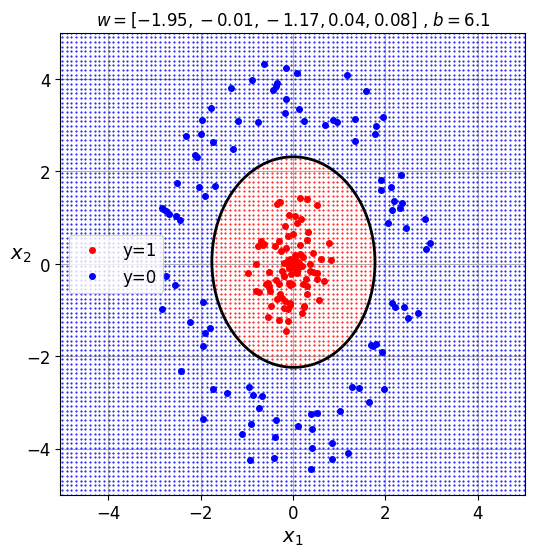

In [33]:
#the line w1*x1+w2*x2+b=0
#and the corresponding classification for the 2D-points

#NxN grid-points
N=100
xx1=np.linspace(-5,5,N)
xx2=np.linspace(-5,5,N)
X1,X2=np.meshgrid(xx1,xx2)#x1x2-pairs, NxN-matrices

Z=w1*X1**2+ w2*X1*X2+ w3*X2**2 +w4*X1 +w5*X2 + b #corresponding values of z, NxN-matrix

#class 1 grid-points
X1pun=X1[Z>=0]
X2pun=X2[Z>=0]
#class 0 grid-points
X1sin=X1[Z<0]
X2sin=X2[Z<0]

# Plot results
plt.figure(figsize=(6,6))
plt.plot(x1pun, x2pun, 'r.', markersize=8, label='y=1')
plt.plot(x1sin, x2sin, 'b.', markersize=8, label='y=0')
plt.plot(X1pun, X2pun, 'r.', markersize=1, alpha=1)
plt.plot(X1sin, X2sin, 'b.', markersize=1, alpha=1)
plt.contour(X1, X2, Z, levels=[0], colors='k', linewidths=2)  # Decision boundary Z = 0

plt.grid()
plt.axis('equal')
plt.title(rf'$w = [{w[0,0]:.2f}, {w[0,1]:.2f}, {w[0,2]:.2f}, {w[0,3]:.2f}, {w[0,4]:.2f}]$ , $b = {b[0]:.1f}$')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()